## Import section

In [59]:
# Import libraries with reasons

# Need to use pandas dataframe
import pandas as pd
from pandas import DataFrame

# library to handle data in a vectorized manner
import numpy as np 

# library to handle requests
import requests 

# Toreplace multiple strings in one go
import re

# module to convert an address into latitude and longitude values
import geocoder
from geopy.geocoders import Nominatim 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import folium

from pandas.io.json import json_normalize

print ("Libries imported")

Libries imported


In [2]:
# Reading the wikipedia and extracting the district info to list
lt_dist_md = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Madrid')
print ("List got created with Madrid district info")

List got created with Madrid district info


In [3]:
# Transferring List to Dataframe
df_dist_md = DataFrame (lt_dist_md[1])
print ('District dataframe created')

District dataframe created


In [4]:
# Data cleansing

# Removing unwanted column
df_dist_md.pop('Location')

# Renaming columns
df_dist_md.rename(columns={"District Number": "Number", "District area[n 1] (Ha.)": "Area (KM Sqr.)","Population density(Hab./Ha.)":"Population density(/KM Sqr.)", "Administrative wards":"Ward"}, inplace = True)

print ('Done')

Done


In [5]:
# Calculations....

# Changing Hectare to KM Square
df_dist_md['Area (KM Sqr.)'] = round(df_dist_md['Area (KM Sqr.)'] * 0.01, 2)

# Changing Population density as per KM Square
df_dist_md['Population density(/KM Sqr.)'] = round(df_dist_md['Population'] / df_dist_md['Area (KM Sqr.)'], 2)

# Removing IsNull values
df_dist_md.drop(df_dist_md[df_dist_md['Number'].isnull()].index, inplace = True)

print ('Done')

Done


In [6]:
# Spliting wards and putting into a new DataFrame
char_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

C1=[]
C2=[]

for ind1 in df_dist_md.index: 
    for ind2 in re.sub("|".join(char_list), "", df_dist_md['Ward'][ind1]).split('()'):
        if len(ind2) > 0:
            C1.append(df_dist_md['Number'][ind1])
            C2.append(ind2)

df_ward_md = pd.DataFrame(C1,columns=['Number'])
df_ward_md['Ward'] = C2

print ('Ward dataFrame created')

Ward dataFrame created


In [7]:
# Adding Latitude and Longitude columns for Districts and Wards
df_dist_md[['Lat', 'Lon']] = pd.DataFrame([[0, 0]])
df_ward_md[['Lat', 'Lon']] = pd.DataFrame([[0, 0]])

In [8]:
print ('Mardir District => ', df_dist_md.shape)
print ('Mardir Ward => ', df_ward_md.shape)

Mardir District =>  (21, 8)
Mardir Ward =>  (131, 4)


In [10]:
geolocator = Nominatim(user_agent="foursquare_agent")

# Updating the Latitude & Longitude for District DataFrame
for ind1 in df_dist_md.index: 
    address = df_dist_md['Name'][ind1] + ', Madrid, Spain'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude

    df_dist_md['Lat'][ind1] = latitude
    df_dist_md['Lon'][ind1] = longitude

# Updating the Latitude & Longitude for Ward DataFrame
for ind1 in df_ward_md.index: 
    address = df_ward_md['Ward'][ind1] + ', Madrid, Spain'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude

    df_ward_md['Lat'][ind1] = latitude
    df_ward_md['Lon'][ind1] = longitude

/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

AttributeError: 'NoneType' object has no attribute 'latitude'

In [11]:
df_dist_md.head(10)

,Number,Name,Area (KM Sqr.),Population,Population density(/KM Sqr.),Ward,Lat,Lon
0,1.0,Centro,5.23,131928,25225.24,Palacio (11)Embajadores (12)Cortes (13)Justici...,40.417653,-3.707914
1,2.0,Arganzuela,6.46,151965,23523.99,Imperial (21)Acacias (22)Chopera (23)Legazpi (...,40.398068,-3.693734
2,3.0,Retiro,5.47,118516,21666.54,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...,40.411150,-3.676057
3,4.0,Salamanca,5.39,143800,26679.04,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...,40.427045,-3.680602
4,5.0,Chamartín,9.18,143424,15623.53,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...,40.458987,-3.676129
5,6.0,Tetuán,5.37,153789,28638.55,Bellas Vistas (61)Cuatro Caminos (62)Castillej...,40.460578,-3.698281
6,7.0,Chamberí,4.68,137401,29359.19,Gaztambide (71)Arapiles (72)Trafalgar (73)Alma...,40.436247,-3.703830
7,8.0,Fuencarral-El Pardo,237.84,238756,1003.85,El Pardo (81)Fuentelarreina (82)Peñagrande (83...,40.556346,-3.778591
8,9.0,Moncloa-Aravaca,46.53,116903,2512.42,Casa de Campo (91)Argüelles (92)Ciudad Univers...,40.439495,-3.744204
9,10.0,Latina,25.43,233808,9194.18,Los Cármenes (101)Puerta del Ángel (102)Lucero...,40.403532,-3.736152


In [20]:
df_ward_md.head(60)

,Number,Ward,Lat,Lon
0,1.0,Palacio,40.415129,-3.715618
1,1.0,Embajadores,40.409681,-3.701644
2,1.0,Cortes,40.414779,-3.697584
3,1.0,Justicia,40.423957,-3.695747
4,1.0,Universidad,40.425409,-3.705989
5,1.0,Sol,40.417827,-3.702222
6,2.0,Imperial,40.406929,-3.717321
7,2.0,Acacias,40.404075,-3.705957
8,2.0,Chopera,40.394893,-3.699705
9,2.0,Legazpi,40.391172,-3.695190


In [23]:
address = 'Puerta del Ángel, Madrid, Spain'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.4137225 -3.7271715


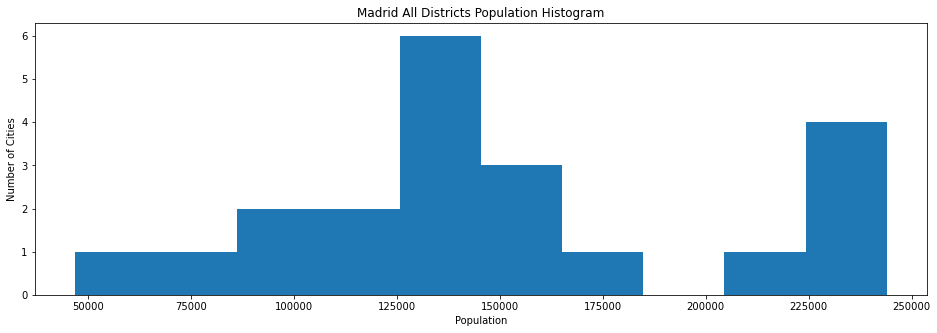

In [27]:
count, bin_edges = np.histogram(df_dist_md['Population'])
df_dist_md['Population'].plot(kind='hist', figsize=(16, 5))
plt.title('Madrid All Districts Population Histogram')
plt.ylabel('Number of Cities')
plt.xlabel('Population')
plt.show()

In [29]:
def toSimpleMap (Map, latitudes, longitudes, LocationNames):

    for lat,lng,city in zip(latitudes, longitudes, LocationNames):
        label = '{}'.format(city)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map)    

In [36]:
Map = folium.Map(location=[40.4168, -3.7038], zoom_start=10)
toSimpleMap (Map, df_dist_md['Lat'], df_dist_md['Lon'],df_dist_md['Name'])
Map

In [39]:
CLIENT_ID = 'JUZASREC0SKEE14BSG0C44LBR4ROZIHIYT0JBGZ5XG5NVSBM' # your Foursquare ID
CLIENT_SECRET = 'ZETXHBITZVSLOCK2KYFONDFFUW5WQYGSYDRPZGDWOKHLG1MX' # your Foursquare Secret
VERSION = '20200807'
LIMIT = 25
latitude = 40.417653 
longitude = -3.707914
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JUZASREC0SKEE14BSG0C44LBR4ROZIHIYT0JBGZ5XG5NVSBM
CLIENT_SECRET:ZETXHBITZVSLOCK2KYFONDFFUW5WQYGSYDRPZGDWOKHLG1MX


In [53]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JUZASREC0SKEE14BSG0C44LBR4ROZIHIYT0JBGZ5XG5NVSBM&client_secret=ZETXHBITZVSLOCK2KYFONDFFUW5WQYGSYDRPZGDWOKHLG1MX&ll=40.417653,-3.707914&v=20200807&radius=500&limit=25'

In [54]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f392075c84c6d0398311ecc'},
 'response': {'venues': [{'id': '5cd423b3ea1e44002cd85b76',
    'name': 'Kfc',
    'location': {'address': 'Arenal',
     'lat': 40.41731,
     'lng': -3.7077272,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.41731,
       'lng': -3.7077272}],
     'distance': 41,
     'postalCode': '28013',
     'cc': 'ES',
     'city': 'Madrid',
     'state': 'Madrid',
     'country': 'España',
     'formattedAddress': ['Arenal', '28013 Madrid Madrid', 'España']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1597579104',
    'hasPerk': False},
   {'id': '4ef20ee77beb49b293bd58c9',
    'name': 'Mango',
    'location': {'address': 'Calle del Arenal, 

In [56]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df1 = json_normalize(venues)
df1.head()

/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,location.crossStreet,venuePage.id
0,5cd423b3ea1e44002cd85b76,Kfc,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1597579104,False,Arenal,40.417310,-3.707727,"[{'label': 'display', 'lat': 40.41731, 'lng': ...",41,28013,ES,Madrid,Madrid,España,"[Arenal, 28013 Madrid Madrid, España]",NaN,NaN,NaN
1,4ef20ee77beb49b293bd58c9,Mango,"[{'id': '4bf58dd8d48988d108951735', 'name': 'W...",v-1597579104,False,"Calle del Arenal, 24",40.417629,-3.707961,"[{'label': 'display', 'lat': 40.41762932619501...",4,28013,ES,Madrid,Madrid,España,"[Calle del Arenal, 24, 28013 Madrid Madrid, Es...",NaN,NaN,NaN
2,5b9a696c0719020025b0e2fb,Burger King,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1597579104,False,"Calle Arenal, 24",40.417769,-3.707989,"[{'label': 'display', 'lat': 40.417769, 'lng':...",14,28013,ES,Madrid,Madrid,España,"[Calle Arenal, 24, 28013 Madrid Madrid, España]",NaN,NaN,NaN
3,5d062310113cf10023713f62,GEOX,"[{'id': '4bf58dd8d48988d107951735', 'name': 'S...",v-1597579104,False,Calle del Arenal 19,40.417570,-3.707944,"[{'label': 'display', 'lat': 40.41757, 'lng': ...",9,28013,ES,Madrid,Madrid,España,"[Calle del Arenal 19, 28013 Madrid Madrid, Esp...",Sol,NaN,NaN
4,4db6c1a5b3dc51f41340909e,La Caixa,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",v-1597579104,False,"C/ Arenal, 24",40.417552,-3.707848,"[{'label': 'display', 'lat': 40.41755223930679...",12,28013,ES,Madrid,Madrid,España,"[C/ Arenal, 24, 28013 Madrid Madrid, España]",NaN,NaN,NaN


In [57]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df1.columns if col.startswith('location.')] + ['id']
dataframe_filtered = df1.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,crossStreet,id
0,Kfc,Fast Food Restaurant,Arenal,40.417310,-3.707727,"[{'label': 'display', 'lat': 40.41731, 'lng': ...",41,28013,ES,Madrid,Madrid,España,"[Arenal, 28013 Madrid Madrid, España]",NaN,NaN,5cd423b3ea1e44002cd85b76
1,Mango,Women's Store,"Calle del Arenal, 24",40.417629,-3.707961,"[{'label': 'display', 'lat': 40.41762932619501...",4,28013,ES,Madrid,Madrid,España,"[Calle del Arenal, 24, 28013 Madrid Madrid, Es...",NaN,NaN,4ef20ee77beb49b293bd58c9
2,Burger King,Fast Food Restaurant,"Calle Arenal, 24",40.417769,-3.707989,"[{'label': 'display', 'lat': 40.417769, 'lng':...",14,28013,ES,Madrid,Madrid,España,"[Calle Arenal, 24, 28013 Madrid Madrid, España]",NaN,NaN,5b9a696c0719020025b0e2fb
3,GEOX,Shoe Store,Calle del Arenal 19,40.417570,-3.707944,"[{'label': 'display', 'lat': 40.41757, 'lng': ...",9,28013,ES,Madrid,Madrid,España,"[Calle del Arenal 19, 28013 Madrid Madrid, Esp...",Sol,NaN,5d062310113cf10023713f62
4,La Caixa,Bank,"C/ Arenal, 24",40.417552,-3.707848,"[{'label': 'display', 'lat': 40.41755223930679...",12,28013,ES,Madrid,Madrid,España,"[C/ Arenal, 24, 28013 Madrid Madrid, España]",NaN,NaN,4db6c1a5b3dc51f41340909e
5,Plaza de Isabel II,Plaza,Pl. Isabel II,40.418114,-3.709397,"[{'label': 'display', 'lat': 40.41811399542555...",135,28013,ES,Madrid,Madrid,España,"[Pl. Isabel II, 28013 Madrid Madrid, España]",Opera,NaN,4b464cb3f964a520f01c26e3
6,La Coquette,Rock Club,"C/ de las Hileras, 14",40.417624,-3.707630,"[{'label': 'display', 'lat': 40.41762440244889...",24,28013,ES,Madrid,Madrid,España,"[C/ de las Hileras, 14, 28013 Madrid Madrid, E...",NaN,NaN,4adcda35f964a520603b21e3
7,Chocolatería San Ginés,Chocolate Shop,"C. Pasadizo de San Ginés, 5",40.416754,-3.707079,"[{'label': 'display', 'lat': 40.41675433699736...",122,28013,ES,Madrid,Madrid,España,"[C. Pasadizo de San Ginés, 5 (C. Arenal), 2801...",NaN,C. Arenal,4adcda35f964a5207d3b21e3
8,Ivor Hotel Madrid,Hotel,Arenal 24,40.417641,-3.707954,"[{'label': 'display', 'lat': 40.4176408, 'lng'...",3,NaN,ES,Madrid,Madrid,España,"[Arenal 24, Madrid Madrid, España]",NaN,NaN,4be1717f8dd062b5ca4a3e3c
9,Farmacia,Pharmacy,NaN,40.418119,-3.708497,"[{'label': 'display', 'lat': 40.41811936595236...",71,NaN,ES,NaN,NaN,España,[España],NaN,NaN,516e5e46e4b0e89d6344abac


In [61]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map